# Петар и вук: Увод у учење путем појачања

У овом туторијалу ћемо научити како да применимо учење путем појачања на проблем проналажења пута. Овај сценарио је инспирисан музичком бајком [Петар и вук](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) руског композитора [Сергеја Прокофјева](https://en.wikipedia.org/wiki/Sergei_Prokofiev). То је прича о младом пиониру Петру, који храбро излази из своје куће на шумску чистину да би јурио вука. Тренираћемо алгоритме машинског учења који ће помоћи Петру да истражи околину и направи оптималну навигациону мапу.

Прво, хајде да увеземо неколико корисних библиотека:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Преглед учења путем појачања

**Учење путем појачања** (RL) је техника учења која нам омогућава да научимо оптимално понашање **агента** у неком **окружењу** кроз извођење многих експеримената. Агент у овом окружењу треба да има неки **циљ**, који је дефинисан **функцијом награде**.

## Окружење

Ради једноставности, замислимо да је Петеров свет квадратна табла димензија `width` x `height`. Свака ћелија на овој табли може бити:
* **тло**, по коме Петер и друга створења могу ходати
* **вода**, по којој, наравно, не можете ходати
* **дрво** или **трава** - место где можете одморити
* **јабука**, која представља нешто што би Петер радо пронашао како би се прехранио
* **вук**, који је опасан и треба га избегавати

Да бисмо радили са окружењем, дефинисаћемо класу под називом `Board`. Да не бисмо превише оптеретили овај бележник, сав код за рад са таблом преместили смо у посебан модул `rlboard`, који ћемо сада увозити. Можете погледати унутар овог модула за више детаља о унутрашњости имплементације.


Хајде сада да направимо насумичну таблу и видимо како изгледа:


In [4]:
# code block 1

## Акције и Политика

У нашем примеру, циљ Петра би био да пронађе јабуку, избегавајући вука и друге препреке. Дефинишите те акције као речник и повежите их са паровима одговарајућих промена координата.


In [5]:
# code block 2

Стратегија нашег агента (Петар) дефинисана је такозваном **политиком**. Хајде да размотримо најједноставнију политику која се зове **случајна шетња**.

## Случајна шетња

Прво ћемо решити наш проблем применом стратегије случајне шетње.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Функција награде

Да бисмо нашу политику учинили интелигентнијом, потребно је да разумемо који потези су "бољи" од других.


In [8]:
#code block 5

## Q-Лернинг

Направите Q-Табелу, или вишедимензионални низ. Пошто наша табла има димензије `width` x `height`, можемо представити Q-Табелу помоћу numpy низа са обликом `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Проследите Q-табелу функцији `plot` како бисте визуализовали табелу на табли:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Суштина Q-Learning-а: Белманова једначина и алгоритам учења

Напишите псеудо-код за наш алгоритам учења:

* Иницијализујте Q-табелу Q са истим вредностима за сва стања и акције
* Поставите стопу учења $\alpha\leftarrow 1$
* Поновите симулацију много пута
   1. Почните са случајне позиције
   1. Понављајте
        1. Изаберите акцију $a$ у стању $s$
        2. Извршите акцију преласком у ново стање $s'$
        3. Ако наиђемо на услов краја игре или је укупна награда сувише мала - изађите из симулације  
        4. Израчунајте награду $r$ у новом стању
        5. Ажурирајте Q-функцију према Белмановој једначини: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Ажурирајте укупну награду и смањите $\alpha$.

## Експлоатација vs. Експлорација

Најбољи приступ је пронаћи равнотежу између истраживања и искоришћавања. Како више учимо о нашем окружењу, вероватније је да ћемо следити оптималну путању, али је важно повремено изабрати неистражену путању.

## Python имплементација

Сада смо спремни да имплементирамо алгоритам учења. Пре тога, потребна нам је и функција која ће произвољне бројеве из Q-табеле претворити у вектор вероватноћа за одговарајуће акције:


In [10]:
# code block 7

Мало количину `eps` додајемо оригиналном вектору како бисмо избегли дељење са 0 у почетном случају, када су све компоненте вектора идентичне.

Стварни алгоритам учења ћемо покренути за 5000 експеримената, који се такође називају **епохе**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Након извршавања овог алгоритма, Q-табела би требало да буде ажурирана вредностима које дефинишу привлачност различитих акција у сваком кораку. Визуализујте табелу овде:


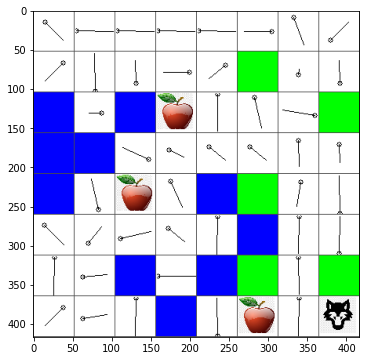

In [43]:
m.plot(Q)

## Провера политике

Пошто Q-табела наводи „атрактивност“ сваке акције у сваком стању, прилично је једноставно користити је за дефинисање ефикасне навигације у нашем свету. У најједноставнијем случају, можемо једноставно изабрати акцију која одговара највишој вредности у Q-табели:


In [13]:
# code block 9

2

Ако пробате код изнад неколико пута, можда ћете приметити да понекад само "заглави", и потребно је да притиснете дугме STOP у нотебоок-у како бисте га прекинули.

> **Задатак 1:** Измените функцију `walk` тако да ограничи максималну дужину пута на одређени број корака (рецимо, 100), и посматрајте како код изнад повремено враћа ову вредност.

> **Задатак 2:** Измените функцију `walk` тако да не иде назад на места на којима је већ био раније. Ово ће спречити `walk` да уђе у петљу, али агент и даље може завршити "заробљен" на локацији са које не може да побегне.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


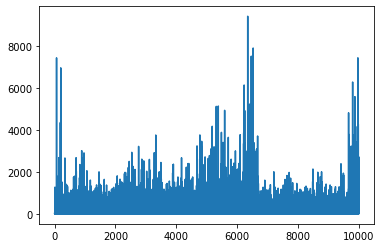

In [57]:
plt.plot(lpath)

## Вежба
## Реалистичнији свет Петра и вука



---

**Одрицање од одговорности**:  
Овај документ је преведен коришћењем услуге за превођење помоћу вештачке интелигенције [Co-op Translator](https://github.com/Azure/co-op-translator). Иако тежимо тачности, молимо вас да имате у виду да аутоматски преводи могу садржати грешке или нетачности. Оригинални документ на изворном језику треба сматрати ауторитативним извором. За критичне информације препоручује се професионални превод од стране људи. Не сносимо одговорност за било каква неспоразумевања или погрешна тумачења која могу произаћи из коришћења овог превода.
